<a href="https://www.kaggle.com/code/ahmeterdemyenay/nlp-approach-to-map-text-documents?scriptVersionId=187965208" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

- In this project, we aim to enhance the Environmental, Social, and Governance (ESG) assessment process using advanced Natural Language Processing (NLP) techniques. The project involves extracting text data from PDF documents, identifying key phrases and keywords using the BERT algorithm, and mapping these keywords to predefined ESG ontology classes. By employing various similarity measures, we aim to accurately categorize text data, facilitating better analysis and decision-making in ESG assessments. This approach not only saves time but also provides a structured method to handle large volumes of text data effectively


<font color = 'blue' >
Content: 
    
1. [Load Required Libraries](#1)
2. [Load Data and Text Extraction](#2)
3. [Preprocessing](#3)
4. [Keyword Extraction using KeyBERT](#4)
5. [Visualization](#5)
    * [Keywords Cloud](#6)
    * [Top Uni-grams](#7)
    * [Top Bi-grams](#8)
    * [Top Tri-grams](#9)
6. [Ontology Matching](#10)
    * [Loading an ontology from OWL files](#11)
    * [Working on Ontologies with Simple Examples](#12)
7. [Functions for Reading and Processing Ontology Data](#13)
8. [String Similarity and Structural Similarity Matrix Functions](#14)
9. [Structural Similarity Analysis of Ontology Classes and Keywords](#15)
10. [Jaccard Similarity Analysis of Ontology Classes and Keywords](#16)
11. [Sequence Similarity Analysis of Ontology Classes and Keywords](#17)
12. [Transformers Similarity Analysis of Ontology Classes and Keywords](#18)
13. [Project Overview and Conclusion](#19)

# Load Required Libraries
<a id = "1"></a>
Here we import all the necessary libraries. Ensure you have installed them before running this notebook.

In [1]:
!pip install contractions
!pip install keybert
!pip install pdfminer
!pip install pdfminer.six
!pip install owlready2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140069 sha256=e93f955547421766b4a48d5aee216b3fa85676588f44cd0b64bdbd316cd5fc8e
  Stored in directory: /root/.cache/pip/wheels/4e/c1/68/f7bd0a8f514661f76b5cbe3b5f76e0033d79f1296012cbbf72
Successfully built pdfminer
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 49.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created whe

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
import nltk
import contractions

nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

from keybert import KeyBERT
from pdfminer.high_level import extract_text
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from collections import Counter
from transformers import BertTokenizer
from owlready2 import *
from difflib import SequenceMatcher
from sentence_transformers import SentenceTransformer, util
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-07-12 11:42:15.155254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 11:42:15.155386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 11:42:15.317107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load Data and Text Extraction
<a id = "2"></a>
In this section, we load the data from a PDF file and extract text from it. Ensure the file path is correct before proceeding. We use the 'extract_text' function to extract text from the PDF, which is a crucial step before preprocessing.

In [3]:
# Extract text from the PDF file in binary mode using a raw string for the file path
text = extract_text(r"/kaggle/input/cathay-pacific-sustainable-development-report-2015/CathayPacific_CX_SDR2015_main_text.pdf", 'rb')

- Explanation of r and rb
- r: This is a string prefix in Python that stands for "raw" string. When you prefix a string with r, it tells Python to treat backslashes (\) as literal characters, not as escape characters. For example, r"\n" is a string containing two characters: a backslash and the letter n, whereas "\n" is a newline character. Using r ensures that file paths are correctly interpreted, especially on Windows where backslashes are used in paths.

- rb: This is a mode used when opening files. In this context:

    - r stands for "read". It means that the file is opened for reading. The file must exist.
    - b stands for "binary". It means that the file is read in binary mode. Binary mode is used when dealing with non-text files (like images or PDFs) or when you want to handle file content as bytes.

In [4]:
# Print the first 1000 characters
text[:1000]

'Sustainable Development Report 2015\n\nTogether for Tomorrow\n\nMessage from the Chief Executive\n\n2015 was a good year for Cathay Pacific. We recorded our best financial performance  \nin the last five years, which was a tremendous achievement by the team especially  \nunder challenging circumstances. This year we made great strides revamping our  \nbrand philosophy, introduced new products and services, and advancing technological \ninnovation. I believe these efforts will really help lay a strong foundation to better position \nourselves for many years to come.\n\nThe industry in which we are operating remains challenging as a result of economic \noutlook, volatility in fuel prices and increasing regulation. I see sustainability as a key \nstrategic value to help mitigate some of these risks, place us in a competitive position, \nand providing us with the licence to grow in the future.\n\n“We want our business to be successful  \nand we got to make it sustainable. I ask \neveryone

In [5]:
# Print the last 1000 characters
text[-1000:]

'nt community.\n\nPerformance Tables and Graphs\n\n•  2015 GHG Emissions (tCO2e) Scope 1 and Scope 2 Table\n•  2015 Global CO2 Emissions\n•  Cathay Pacific Group Fleet\n•  Environmental Indicators Table\n•  Social Indicators Table\n•  Economic Value Added Table\n•  20/20 Commitments and Progress\n\nGovernance and the CX Group\n\n•  Governance of Sustainability Factsheet\u2009\n•  Group Fleet Profile\n•  CX Annual Report 2015\u2009\n\nGRI G4 Content Index\n\n•  GRI G4 Content Index\u2009\n\n5\n\nResourcesCathay Pacific Sustainable Development Report 2015\x0cReport Archive\n\nReport Archive\n\nReport 2014\n\nReport 2013\n\nPDF\n\nGo to website\n\nPDF\n\nGo to website\n\nReport 2012\n\nReport 2011\n\nPDF\n\nGo to website\n\nPDF\n\nGo to website\n\nReport 2010\n\nReport 2009\n\nPDF\n\nGo to website\n\nPDF\n\nGo to website\n\n6\n\nResourcesCathay Pacific Sustainable Development Report 2015\x0cReport Archive\n\nReport 2008\n\nReport 2007\n\nPDF\n\nPDF\n\nReport 2006\n\nReport 2005\n\nPDF\n\n

# Preprocessing
<a id = "3"></a>
Data preprocessing is the process of transforming raw data into clean text. In general, preprocessing refers to the adjustments performed on the data prior to feeding it into the algorithm. It is simply converting raw data into an intelligible format. As can be seen, more than one preprocessing step must be done on the text. Some of these are:

- Replacing brackets,\n, and \x0c with whitespace
- Removing uniceods like \u220c
- Converting all uppercase characters to lowercase
- Removing special characters
- Removing stopwords

In [6]:
## Text Level Processors

# Replace brackets,\n, and \x0c with whitespace, and removing possessive apostrophes
translation_table = str.maketrans({
    '(': '',
    ')': '',
    '[': '',
    ']': '',
    '\n': ' ',
    '\x0c': '. '
})

# Apply the translation table to the text
text = text.translate(translation_table)

# Replace possessive 's
text = text.replace("’s", '')

# Remove non-ASCII characters
text = text.encode("ascii", "ignore").decode()

# Replace contractions with their expanded forms
text = contractions.fix(text)

# Remove all digits from the text
text = ''.join(filter(lambda item: not item.isdigit(), text))

# Convert all characters to lowercase
text = text.lower()

# Remove special characters
text = re.sub(r'\(|\)|:|,|;|\.|’||“”•|\?|%|>|<*', '', text)
text = re.sub(r'/', ' ', text)
text = text.replace("'", '')

# Remove stopwords
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)
text = ' '.join([word for word in text.split() if word not in stopwords_dict])

# The first and last 1000 characters
text[:1000] + "******************************************" + text[-1000:]

'sustainable development report together tomorrow message chief executive good year cathay pacific recorded best financial performance last five years tremendous achievement team especially challenging circumstances year made great strides revamping brand philosophy introduced new products services advancing technological innovation believe efforts really help lay strong foundation better position many years come industry operating remains challenging result economic outlook volatility fuel prices increasing regulation see sustainability key strategic value help mitigate risks place us competitive position providing us licence grow future want business successful got make sustainable ask everyone innovative contribute environment future ivan chu chief executive message chief executive landmark year climate change paris agreement making significant statement progress towards solution global climate change welcome call governments businesses act collective responsibility end continued in

# Keyword Extraction using KeyBERT
<a id = "4"></a>
- KeyBERT is a keyword extraction technique that leverages BERT (Bidirectional Encoder Representations from Transformers) embeddings to identify the most relevant keywords and keyphrases in a document. It works by first generating document embeddings using a pre-trained BERT model, which captures the semantic meaning of the text.

- Then, it generates embeddings for potential keywords and keyphrases within the document. By calculating the cosine similarity between the document embeddings and the candidate keyword embeddings, KeyBERT ranks the keywords based on their relevance to the overall content.

- This allows for the extraction of meaningful and contextually appropriate keywords and keyphrases that accurately represent the main topics and themes of the document. KeyBERT is particularly useful for applications such as summarization, indexing, and enhancing search functionality.

In [7]:
# Initialize the KeyBERT model with the 'all-mpnet-base-v2' model
kw_model = KeyBERT(model='all-mpnet-base-v2')

# Extract keywords from the text
keywords = kw_model.extract_keywords(text, 

                                     keyphrase_ngram_range=(1,1), # Extract single words (unigrams) as keywords
                                     
                                     stop_words='english', # Remove common English stopwords

                                     highlight=True, # Highlight the keywords in the document

                                     top_n=141 # Return the top 141 keywords 
                                    )

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

sustainable development report together tomorrow message chief executive good year cathay pacific recorded best 
financial performance last five years tremendous achievement team especially challenging circumstances year made 
great strides revamping brand philosophy introduced new products services advancing technological innovation 
believe efforts really help lay strong foundation better position many years come industry operating remains 
challenging result economic outlook volatility fuel prices increasing regulation see sustainability key strategic 
value help mitigate risks place us competitive position providing us licence grow future want business successful 
got make sustainable ask everyone innovative contribute environment future ivan chu chief executive message chief 
executive landmark year climate change paris agreement making significant statement progress towards solution 
global climate change welcome call governments businesses act collective responsibility end continued invest new 
fleet make airline efficient possible also helps minimise carbon footprint also actively explore avenues 
sustainable alternative fuel order reduce reliance use fossil based fuel last year retired less fuel efficient 
aircraft worked closely manufacturer supplier embark innovative solution recycle aircraft weight could recovered 
also introduced different ways engage staff using internal social media platforms like yammer better facilitate 
dialogues staff well crowdsourcing platform made easier staff contribute ideas sustainability looking ahead 
promises eventful year us aviation industry excited receiving first batch new aircraft offer latest advances 
technology operations passenger comfort navigation deliver step change efficiency environmental benefits really 
help us meet carbon reduction objectives another big occasion icao th assembly autumn eyes icao reach agreement key
construct market based measures cap aviation emissions levels international effort agree design scheme together 
easy process cannot stress enough importance parties involved work together reach agreement fail uncertainty 
patchwork regulations globally certainly make industry less efficient competitive together developed strong 
capability sustainability years look forward team continuing make efforts strategy carrying innovating making 
airline sustainable possible tomorrow ivan chu chief executive want find go video right ivan chu chief executive 
talks latest sustainable development report video video working towards sustainable future highlights cathay 
pacific make aviation sustainable together tomorrowcathay pacific sustainable development report together tomorrow 
together tomorrow introduction cathay pacific sustainable development report sustainability constant pursuit years 
cathay pacific believe sustainability successful teams work together achieve common long term goals issues fuel 
efficiency really tackled cross departments operations engineering product services teams working related solutions
focus staff engagement year platforms reflects ambition applications like yammer crowd sourcing tools allow us 
break silos enable us work together effectively working together also extends partnerships stakeholders outside 
airline continue participate stay touch industry associations governments ngos global community address solve 
problems industry faces year seen continuation sustainability efforts continue make steady steps improve 
efficiencies reduce impacts well making inroads better integrating communicating efforts throughout report find 
details new initiatives pursing past year together new videos tell stories mark historic moment aviation 
environment icao market based measures expected agreed really game changing deal carbon emissions industry company 
continue progress commitments already laying foundations tomorrow challenges sustainability successful teams work 
together achieve common long term goals john slosar chairman together 

In [8]:
# List of keywords with their similarity scores
keywords

[('iata', 0.4505),
 ('boeing', 0.4214),
 ('sustainability', 0.4054),
 ('airbus', 0.4035),
 ('airlines', 0.3899),
 ('partnership', 0.375),
 ('stakeholder', 0.3749),
 ('aviation', 0.3675),
 ('airline', 0.3628),
 ('partnerships', 0.3618),
 ('stakeholders', 0.3612),
 ('organisational', 0.3569),
 ('flights', 0.3499),
 ('achieving', 0.3455),
 ('aerospace', 0.3443),
 ('aircraft', 0.3434),
 ('achieve', 0.341),
 ('icao', 0.3407),
 ('companies', 0.3376),
 ('flight', 0.3355),
 ('partnering', 0.335),
 ('sustainable', 0.3349),
 ('cathaypacificcom', 0.3323),
 ('organisations', 0.3305),
 ('industry', 0.3302),
 ('organisation', 0.3297),
 ('success', 0.3233),
 ('merger', 0.3191),
 ('business', 0.3176),
 ('environmental', 0.3168),
 ('organization', 0.3166),
 ('stewardship', 0.3129),
 ('initiatives', 0.3129),
 ('emissions', 0.3117),
 ('company', 0.3102),
 ('inspire', 0.3086),
 ('innovating', 0.3064),
 ('pricewaterhousecoopers', 0.3037),
 ('fuelstechnologyin', 0.3035),
 ('stewards', 0.2989),
 ('environmen

- The numbers next to the keywords are the cosine similarity scores. These scores indicate how closely each keyword is related to the overall content of the document. Here is what they represent:

    - Cosine Similarity Score: This value measures the similarity between the document embeddings and the candidate keyword embeddings. The score ranges from -1 to 1, where:
        - 1 indicates perfect similarity.
        - 0 indicates no similarity.
        - -1 indicates perfect dissimilarity (not typically used in this context).
- Higher scores mean that the keyword is more relevant and closely related to the main topics and themes of the document.

In [9]:
# To get just keys from keywords dictionary

keywords_list= list(dict(keywords).keys())
print(keywords_list)

['iata', 'boeing', 'sustainability', 'airbus', 'airlines', 'partnership', 'stakeholder', 'aviation', 'airline', 'partnerships', 'stakeholders', 'organisational', 'flights', 'achieving', 'aerospace', 'aircraft', 'achieve', 'icao', 'companies', 'flight', 'partnering', 'sustainable', 'cathaypacificcom', 'organisations', 'industry', 'organisation', 'success', 'merger', 'business', 'environmental', 'organization', 'stewardship', 'initiatives', 'emissions', 'company', 'inspire', 'innovating', 'pricewaterhousecoopers', 'fuelstechnologyin', 'stewards', 'environmentally', 'management', 'wwwcathaypacificcom', 'managementcathay', 'develop', 'successful', 'organise', 'executive', 'ecotourism', 'aeronautics', 'progress', 'leadership', 'corporate', 'developments', 'industrial', 'consolidating', 'managing', 'revamping', 'collaborations', 'efficiencies', 'collaborate', 'charter', 'dow', 'flying', 'biofuels', 'businesses', 'innovation', 'biodiversitycathay', 'economy', 'accountants', 'partners', 'procu

# Visualization
<a id = "5"></a>
We visualize the extracted keywords using a word cloud and display top n-grams to understand the text better.

### Keywords Cloud
<a id = "6"></a>

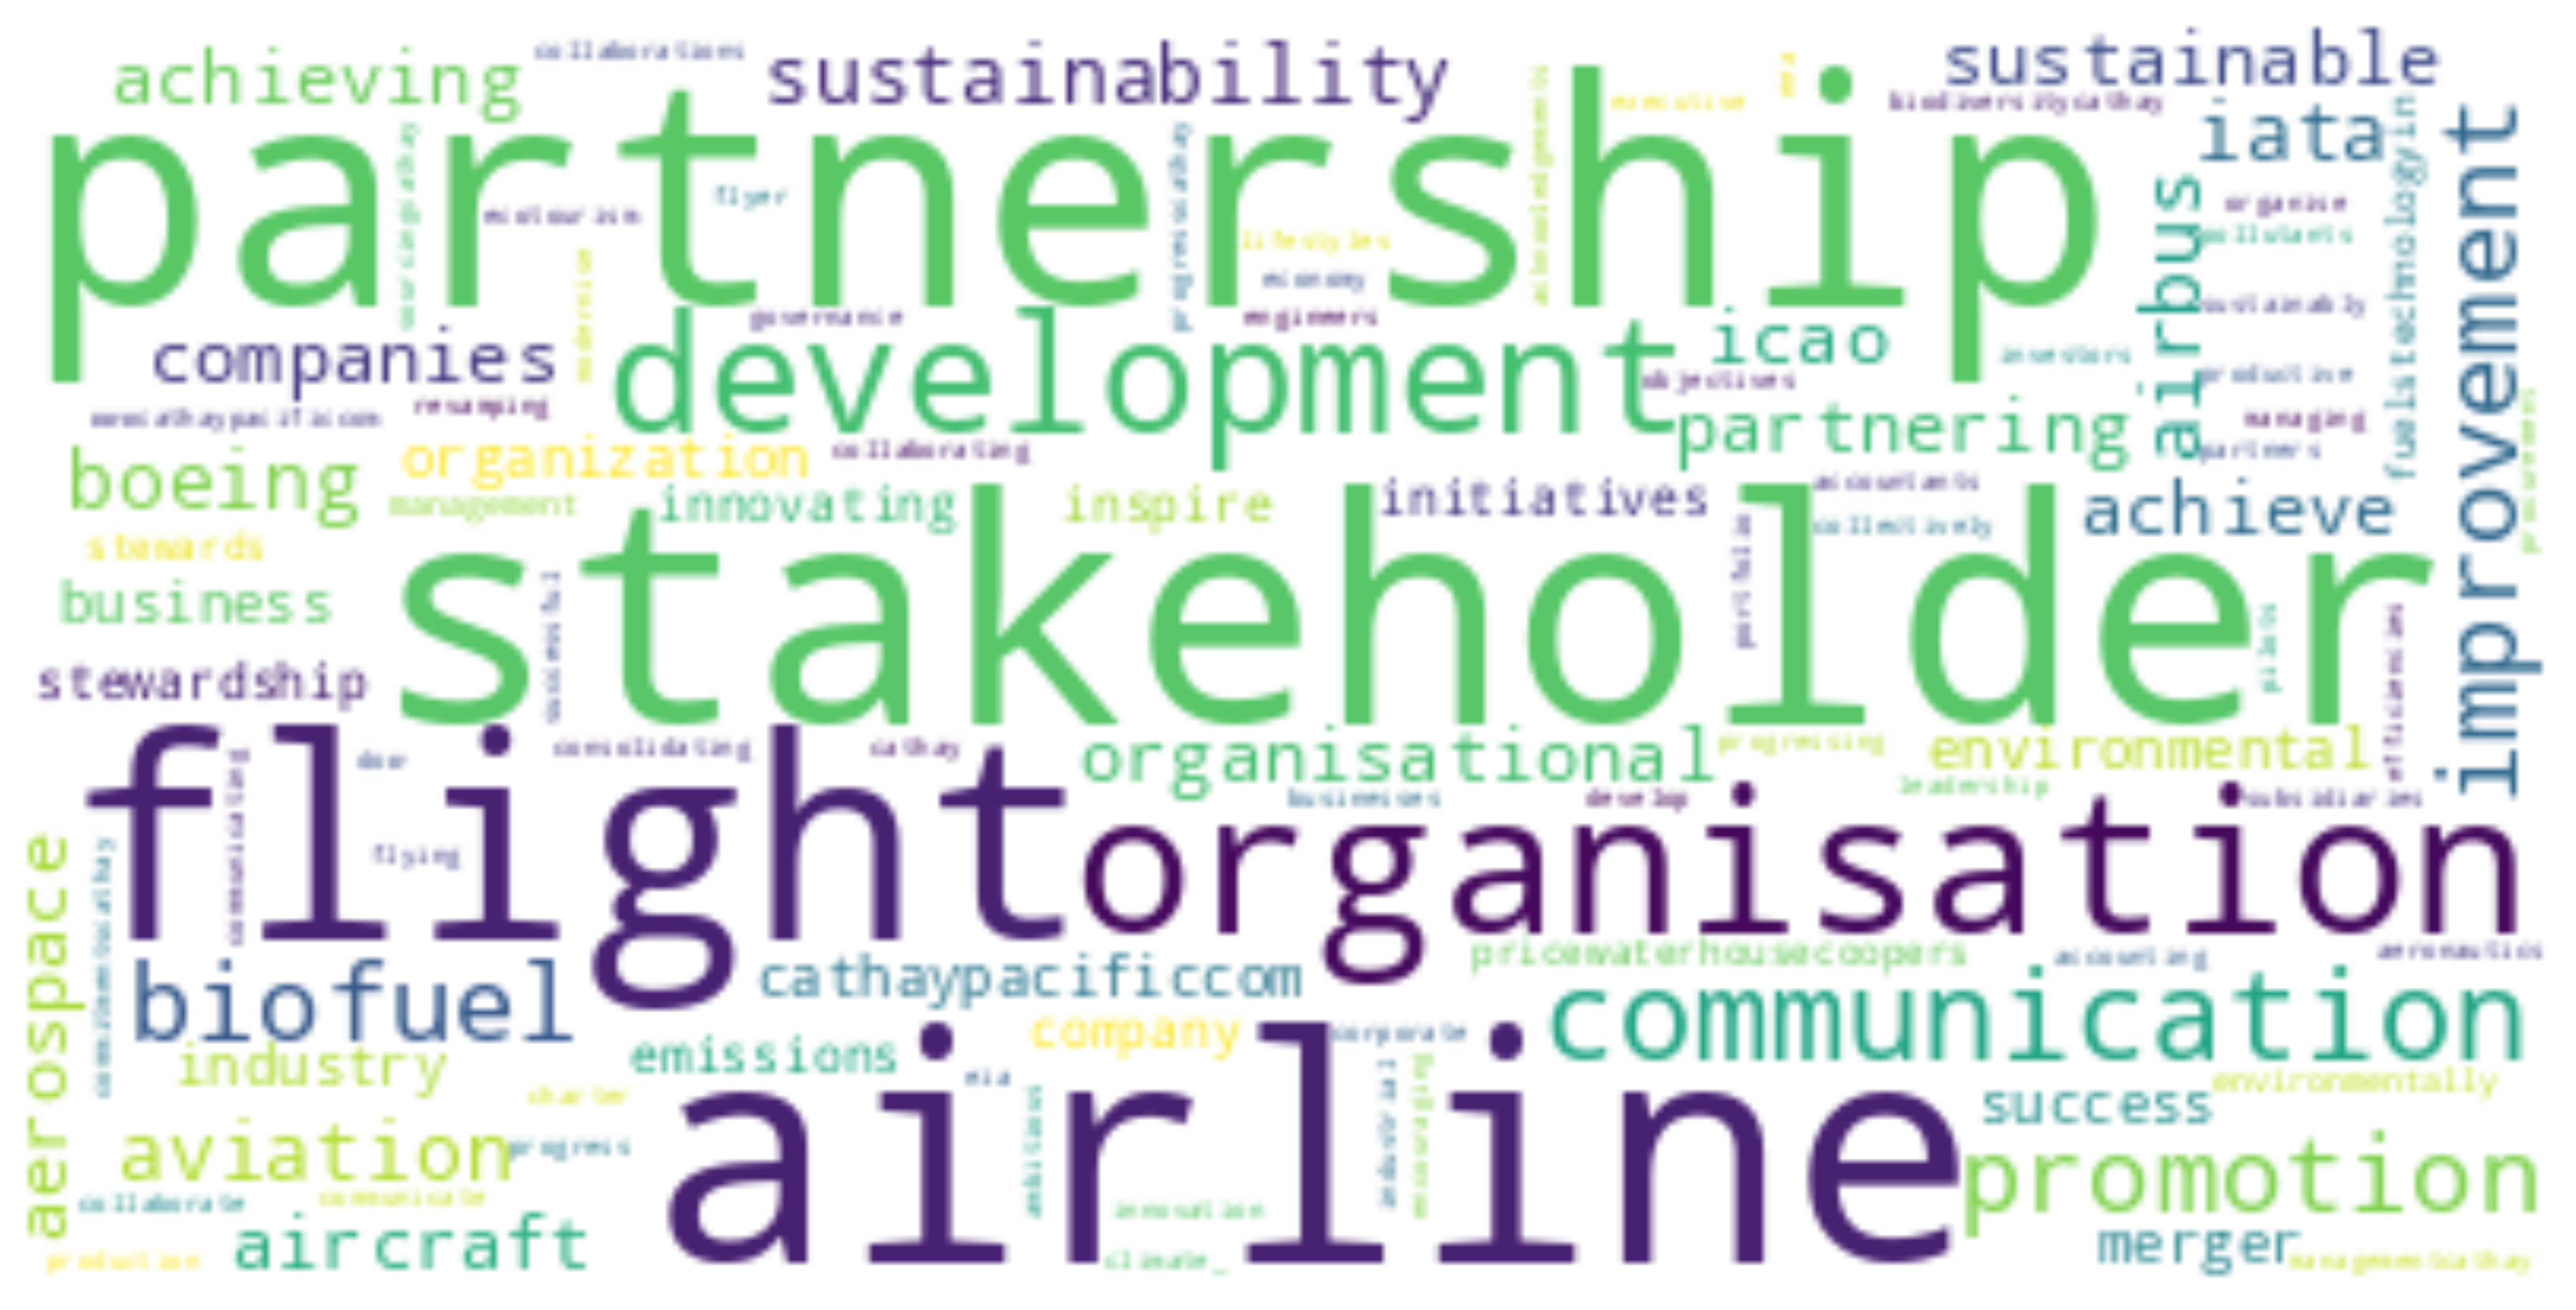

In [10]:
#Creating keywords cloud to get insights on the most frequently used words
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords.words('english'),
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(' '.join(keywords_list))

# Set up the figure size and DPI
fig = plt.figure(figsize=(15, 12), dpi=500)  # Increase DPI for better resolution
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Visualize top N uni-grams, bi-grams & tri-grams using vector of word counts

In [11]:
# Convert the text string to a list to ensure compatibility with libraries that expect a list of documents.
# This allows uniform handling of single or multiple text samples in subsequent processing steps.
text = [text]

In [12]:
# Function to get top n-grams
def get_top_nK_words(text, K=1, n=None):
    vec1 = CountVectorizer(max_df=10,stop_words=stopwords.words('english'), ngram_range=(K,K),  
            max_features=2000).fit(text)
    bag_of_words = vec1.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

### Top Uni-grams
<a id = "7"></a>
- Uni-gram: A single word or token in a text.
- Top Uni-grams: The most frequently appearing uni-grams in the text. These are typically sorted by their frequency of occurrence.

             Words  Freq
0          pacific   246
1      sustainable   235
2           cathay   190
3           report   189
4      development   158
5   sustainability    89
6             fuel    86
7             hong    84
8             kong    84
9        emissions    74
10           group    73
11         climate    69
12          safety    69
13        aircraft    67
14           staff    67
15            year    59
16          change    56
17      management    53
18           waste    52
19     commitments    48


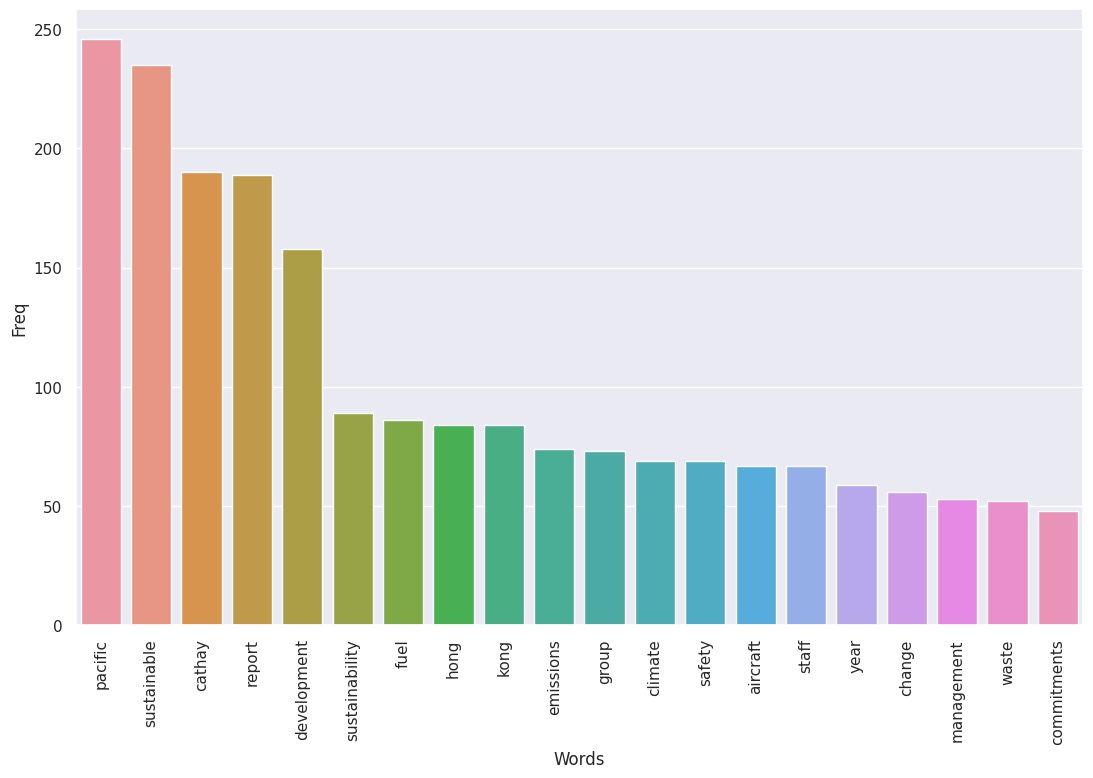

In [13]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_nK_words(text, K=1, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Words", "Freq"]
print(top_df)

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Words", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig = g.get_figure()

### Top Bi-grams
<a id = "8"></a>
- Bi-gram: A sequence of two consecutive words or tokens in a text.
- Top Bi-grams: The most frequently appearing bi-grams in the text. These are typically sorted by their frequency of occurrence.

                       Bi-gram  Freq
0               cathay pacific   173
1      sustainable development   143
2           development report   107
3          pacific sustainable    88
4                    hong kong    84
5               climate change    52
6            pacific dragonair    25
7                   cabin crew    23
8                 supply chain    22
9                pacific group    20
10        sustainable sourcing    19
11              report updates    19
12  sustainability information    19
13                   want find    18
14                     find go    18
15             fuel efficiency    18
16            waste management    18
17   identified sustainability    18
18                co emissions    17
19        development strategy    16


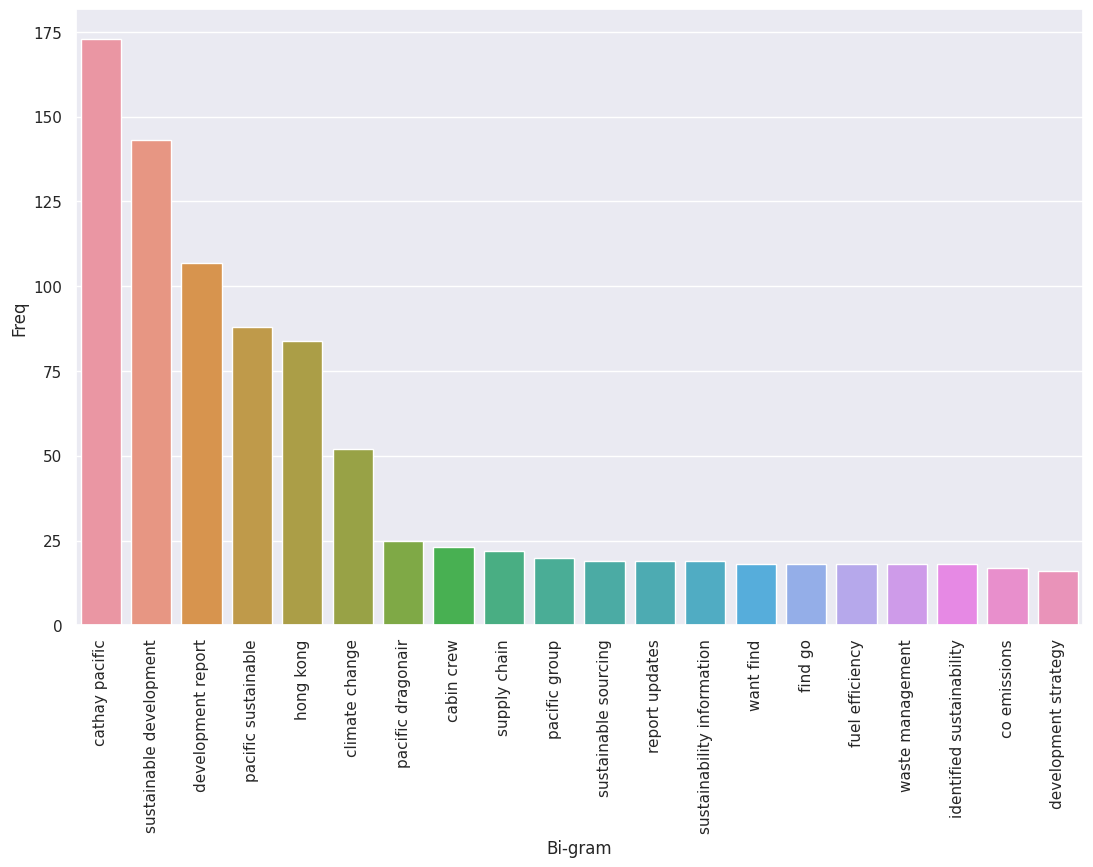

In [14]:
# Top bi-grams
top2_words = get_top_nK_words(text, K=2, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
fig = h.get_figure()

### Top Tri-grams
<a id = "9"></a>
- Tri-gram: A sequence of three consecutive words or tokens in a text.
- Top Tri-grams: The most frequently appearing tri-grams in the text. These are typically sorted by their frequency of occurrence.

                                 Tri-gram  Freq
0          sustainable development report   107
1         pacific sustainable development    88
2                cathay pacific dragonair    25
3                    cathay pacific group    20
4              cathay pacific sustainable    19
5              development report updates    19
6                            want find go    18
7   identified sustainability information    18
8        sustainable development strategy    15
9          development report sustainable    13
10           climate changecathay pacific    13
11       changecathay pacific sustainable    13
12                  report cathay pacific    12
13     progresscathay pacific sustainable    12
14         report sustainable development    11
15            development report overview    11
16                 cathay pacific airways    11
17        together tomorrowcathay pacific    10
18     tomorrowcathay pacific sustainable    10
19       approach sustainable developmen

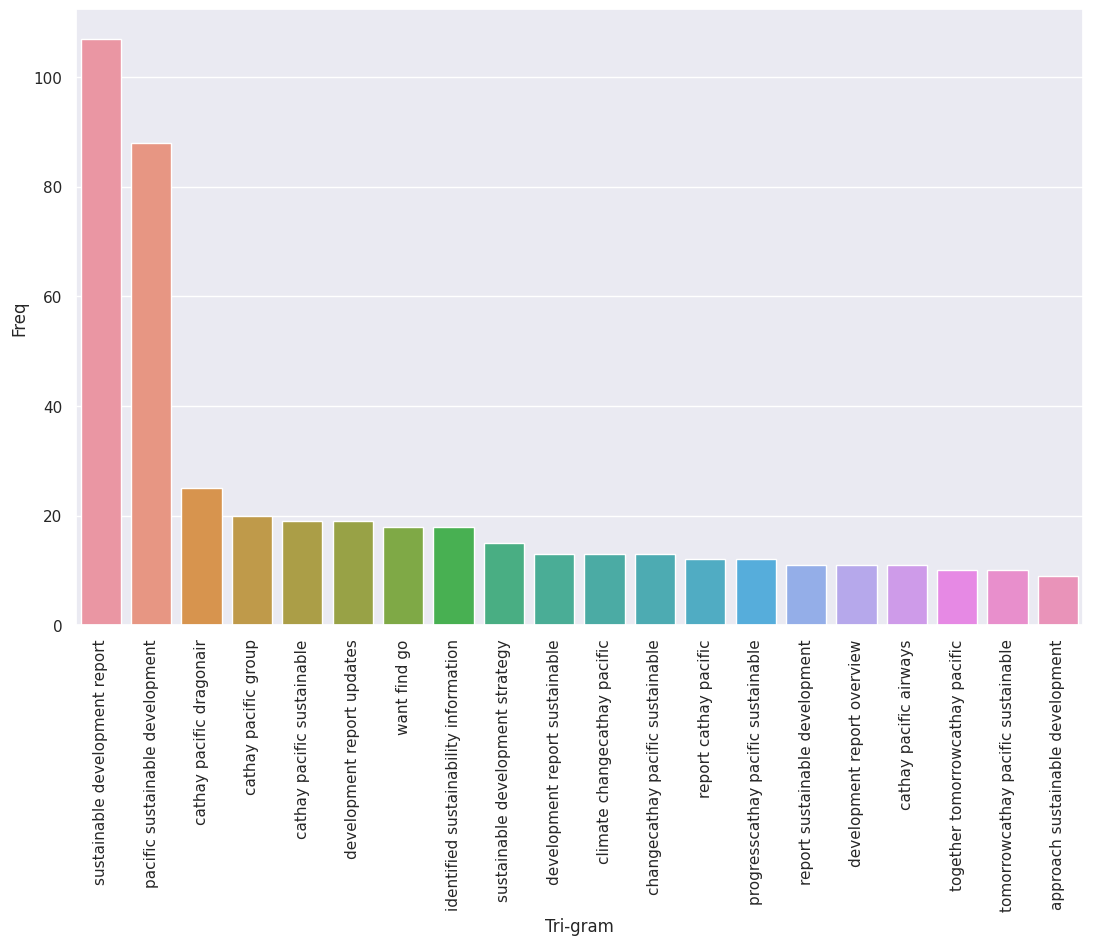

In [15]:
top3_words = get_top_nK_words(text, K=3, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
fig = j.get_figure()

In [16]:
# Converting list to string again
text = ''.join(text)

# Ontology Matching
<a id = "10"></a>
Keywords are matched with ontology classes using similarity measures. This helps in understanding the context and relevance of the keywords.

### Loading an ontology from OWL files
<a id = "11"></a>

In [17]:
ESG_MM = get_ontology("/kaggle/input/cathay-pacific-sustainable-development-report-2015/ESG_MM_KPIs.owl").load()

In [18]:
# List all the classes defined in the ontology
list(ESG_MM.classes())

[ESG_MM_KPIs.Access_to_Basic_Services,
 ESG_MM_KPIs.Social,
 ESG_MM_KPIs.Access_to_Healthcare,
 ESG_MM_KPIs.Animal_Welfare,
 ESG_MM_KPIs.Anti-Competitive_Practices,
 ESG_MM_KPIs.AuM_under_ESG,
 ESG_MM_KPIs.E,
 ESG_MM_KPIs.Audit,
 ESG_MM_KPIs.Governance,
 ESG_MM_KPIs.Biodiversity,
 ESG_MM_KPIs.Environment,
 ESG_MM_KPIs.Board,
 ESG_MM_KPIs.Board_Diversity,
 ESG_MM_KPIs.Board_Gender_Diversity,
 ESG_MM_KPIs.Building_Certification,
 ESG_MM_KPIs.Business_Ethics,
 ESG_MM_KPIs.CO2_Emission_of_Fleet_of_Sold_Leased,
 ESG_MM_KPIs.Certification_of_Facilities,
 ESG_MM_KPIs.S,
 ESG_MM_KPIs.Chairman_Ceo_Separation,
 ESG_MM_KPIs.Child_Labor,
 ESG_MM_KPIs.Climate_Risk_Management,
 ESG_MM_KPIs.Clinical_Trials,
 ESG_MM_KPIs.Others,
 ESG_MM_KPIs.Collective_Bargaining,
 ESG_MM_KPIs.Community_and_Society,
 ESG_MM_KPIs.Contributions_to_political_parties,
 ESG_MM_KPIs.Contributions_to_political_parties_KPI,
 ESG_MM_KPIs.G,
 ESG_MM_KPIs.Corruption,
 ESG_MM_KPIs.Customer_Relationship,
 ESG_MM_KPIs.Demographic_C

### Working on Ontologies with Simple Examples
<a id = "12"></a>

In [19]:
# Search for entities in the ontology by their full IRI (Internationalized Resource Identifiers)
# Parameters:
# - iri: The search pattern for the IRI (in this case, any IRI containing "board")
# - _case_sensitive: Whether the search should consider case sensitivity (default is True, set to False here)

# Perform the search in the ontology for entities whose IRI contains the term "board", ignoring case sensitivity
ESG_MM.search(iri="*board*", _case_sensitive=False)

[ESG_MM_KPIs.Board, ESG_MM_KPIs.Board_Diversity, ESG_MM_KPIs.Board_Gender_Diversity]

In [20]:
# To search for entities across all loaded ontologies
# Parameters:
# - iri: The search pattern for the IRI (in this case, any IRI containing "for")
# - _case_sensitive: Whether the search should consider case sensitivity (default is True, set to False here)

# Perform the search across all ontologies in the default world for entities whose IRI contains the term "for", ignoring case sensitivity
results = default_world.search(iri="*for*", _case_sensitive=False)

for result in results:
    print(result)

ESG_MM_KPIs.Expenditure_for_Veterinary_Pharmaceuticals_Seeds_Herbicides_Pesticides_and_Other_Drugs
ESG_MM_KPIs.Forests
ESG_MM_KPIs.Maturity_of_workforce
ESG_MM_KPIs.Supplier_Agreements_and_Supply_Chain_Partners_Screened_for_Risk_of_ESG_Infringement


In [21]:
# Retrieve the superclasses of the Board class
ESG_MM.Board.is_a

[ESG_MM_KPIs.Social]

In [22]:
# The subclasses() method gets the list of child classes
list(ESG_MM.Social.subclasses())

[ESG_MM_KPIs.Access_to_Basic_Services,
 ESG_MM_KPIs.Access_to_Healthcare,
 ESG_MM_KPIs.Animal_Welfare,
 ESG_MM_KPIs.Anti-Competitive_Practices,
 ESG_MM_KPIs.Board,
 ESG_MM_KPIs.Board_Diversity,
 ESG_MM_KPIs.Board_Gender_Diversity,
 ESG_MM_KPIs.Business_Ethics,
 ESG_MM_KPIs.Chairman_Ceo_Separation,
 ESG_MM_KPIs.Child_Labor,
 ESG_MM_KPIs.Community_and_Society,
 ESG_MM_KPIs.Discrimination_and_Diversity,
 ESG_MM_KPIs.Employee_Development,
 ESG_MM_KPIs.Employee_Turnover,
 ESG_MM_KPIs.HIV_Programmes,
 ESG_MM_KPIs.Health_and_Safety,
 ESG_MM_KPIs.Human_Rights,
 ESG_MM_KPIs.Indigenous_Rights,
 ESG_MM_KPIs.Labor_Practices,
 ESG_MM_KPIs.Public_Health,
 ESG_MM_KPIs.Remuneration]

In [23]:
# Create a DataFrame from a list of keywords
keyword_df = pd.DataFrame (keywords_list, columns = ['keywords'])
keyword_df

keywords
0              iata
1            boeing
2    sustainability
3            airbus
4          airlines
..              ...
136          career
137      accordance
138          unicef
139           fuels
140         airways

[141 rows x 1 columns]

# Functions for Reading and Processing Ontology Data
<a id = "13"></a>
- This set of functions is designed to read an ontology file to extract classes from the ontology, create hierarchical paths of these classes and return a pandas DataFrame containing the class details. In addition, there is a function that extracts class mappings from an XML file.

In [24]:
def read_ontology(path):
    """
    Reads an ontology from a given file path and returns a list of classes.
    
    Parameters:
    - path: The file path to the ontology file.
    
    Returns:
    - A list of unique classes found in the ontology.
    """
    onto = get_ontology(path)
    onto.load()

    # Read classes
    classes = []
    
    for cl in onto.classes():
        classes.append(cl)

    classes = list(set(classes))

    return classes


def get_mappings(filename):
    """
    Parses an XML file to extract class mappings.
    
    Parameters:
    - filename: The file path to the XML file.
    
    Returns:
    - A list of class mappings found in the XML file.
    """
    mappings = []

    with open(filename) as f:
        soup = BeautifulSoup(f, 'xml')

    cells = soup.find_all('Class')

    for cell in cells:
        entity1 = cell.get_attribute_list

        mappings.append(entity1)

    return mappings



def get_path(cl):
    """
    Generates a path string for a given class, tracing its hierarchy up to the root.
    
    Parameters:
    - cl: The class for which to generate the path.
    
    Returns:
    - A string representing the hierarchical path of the class.
    """
    path = cl.name
    while True:
        try:
            path = path + '/' + cl.is_a[0].name
        except IndexError:
            break
        cl = cl.is_a[0]
        if cl == 'owl.Thing':
          #the very first node
            break

    return '/'.join(path.split('/')[::-1])



def get_classes_df(ont_path):
    """
    Parses an ontology and returns a DataFrame of its classes with their details.
    
    Parameters:
    - ont_path: The file path to the ontology file.
    
    Returns:
    - A pandas DataFrame with columns ['Name', 'Path', 'label', 'comment'] containing class details.
    """
    data = []

    # Parse ontologies
    classes1 = read_ontology(ont_path)

    # Generate classes
    for class_ in classes1:
        data.append((class_.name.lower(), 
                     get_path(class_).lower(),''.join(class_.label).lower(),''.join(class_.comment).lower()))
    dataset = pd.DataFrame(data, columns=['Name','Path','label','comment'])

    return dataset

# String Similarity and Structural Similarity Matrix Functions
<a id = "14"></a>
- This set of functions is designed to compute the Levenshtein distance between two strings, generate a structural similarity matrix between ontology classes and keywords, and plot a heatmap of the similarity matrix. These tools are useful for measuring and visualizing the similarity between different text entities, which can be valuable in various natural language processing and ontology mapping tasks.

In [25]:
def iterative_levenshtein(s, t, costs=(1, 1, 1)):
    """
    Computes the Levenshtein distance between two strings.
    
    Parameters:
    - s: The first string.
    - t: The second string.
    - costs: A tuple or a list with three integers (d, i, s) defining the costs for deletion, insertion, and substitution.
    
    Returns:
    - The Levenshtein distance between the two strings.
    
    Taken from python course example at: https://python-course.eu/applications-python/levenshtein-distance.php 
    """
    
    rows = len(s) + 1
    cols = len(t) + 1
    deletes, inserts, substitutes = costs
    
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # Source prefixes can be transformed into empty strings by deletions:
    for row in range(1, rows):
        dist[row][0] = row * deletes

    # Target prefixes can be created from an empty source string by inserting the characters
    for col in range(1, cols):
        dist[0][col] = col * inserts
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = substitutes
            dist[row][col] = min(dist[row-1][col] + deletes,
                                 dist[row][col-1] + inserts,
                                 dist[row-1][col-1] + cost)  # substitution

    # Return the final computed distance
    return dist[row][col]


def struc_similarity_matrix(path1,keyword_df):
    """
    Computes a structural similarity matrix between ontology classes and keywords.
    
    Parameters:
    - path1: The file path to the ontology file.
    - keyword_df: A DataFrame containing keywords.
    
    Returns:
    - A DataFrame representing the structural similarity matrix.
    """
    df1_ = get_classes_df(path1)
    df2_ = keyword_df

    costs=(1,1,1)

    entity_list = df1_['Name'].values
    entity_list2 = df2_['keywords'].values

    #l1 = df1_['Path'].values
    #l2 = df2_['Path'].values


    #Create empty matrix to fill
    M_sim = np.zeros((entity_list.shape[0],entity_list2.shape[0]))

    #Iterate and fill 
    for i in range(entity_list.shape[0]):
        u = entity_list2[i]
        for j in range(entity_list2.shape[0]):
            v = entity_list2[j]
          #similarity -> structural similarity 
            M_sim[i,j] = iterative_levenshtein(u,v,costs)

    DF_sim = pd.DataFrame(M_sim,columns=entity_list2,index=entity_list)

    return DF_sim

def sim_plot(sim_df,threshold):
    """
    Plots a heatmap of the similarity matrix, applying a threshold to filter values.
    
    Parameters:
    - sim_df: The DataFrame containing the similarity matrix.
    - threshold: The threshold value below which similarities are set to zero.
    
    Returns:
    - None
    """
    plot_df = sim_df
    plot_df[plot_df<threshold]=0.0
    rows = sim_df.shape[0]
    cols = sim_df.shape[1]

    plt.figure(figsize=((1*rows),(1*cols)))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    cg = sns.heatmap(sim_df, fmt="g", cmap=cmap,linewidths=5, linecolor='black')


# Structural Similarity Analysis of Ontology Classes and Keywords
<a id = "15"></a>
- This code performs structural similarity analysis between ontology classes and the keywords. It calculates a similarity matrix, visualizes it, and then processes the data into a more readable format.

In [26]:
# Calculate Structural Similarity Matrix:
sim_matrix = struc_similarity_matrix('/kaggle/input/cathay-pacific-sustainable-development-report-2015/ESG_MM_KPIs.owl',keyword_df)
sim_matrix

iata  boeing  sustainability  \
health_and_safety                          0.0     6.0            11.0   
energy                                     6.0     0.0            12.0   
restructuring-related_relocation_of_jobs  11.0    12.0             0.0   
dimensions_of_pending_legal_proceedings    5.0     6.0            11.0   
waste_kpi                                  7.0     6.0            11.0   
...                                        ...     ...             ...   
supply_chain                               5.0     6.0            13.0   
waste                                      9.0     8.0            13.0   
health_&_safety_aspects_of_products        5.0     6.0            11.0   
radioactive_waste                          5.0     5.0            12.0   
clinical_trials                            5.0     7.0            12.0   

                                          airbus  airlines  partnership  \
health_and_safety                            5.0       7.0          9.0   
energy                                       6.0       6.0         10.0   
restructuring-related_relocation_of_jobs    11.0      11.0         11.0   
dimensions_of_pending_legal_proceedings      0.0       4.0          9.0   
waste_kpi                                    4.0       0.0          8.0   
...                                          ...       ...          ...   
supply_chain                                 5.0       6.0          7.0   
waste                                        8.0       7.0         10.0   
health_&_safety_aspects_of_products          6.0       6.0         10.0   
radioactive_waste                            5.0       6.0          9.0   
clinical_trials                              3.0       4.0          9.0   

                                          stakeholder  aviation  airline  \
health_and_safety                                10.0       5.0      6.0   
energy                                           10.0       7.0      5.0   
restructuring-related_relocation_of_jobs         10.0      11.0     10.0   
dimensions_of_pending_legal_proceedings          10.0       6.0      4.0   
waste_kpi                                         9.0       6.0      1.0   
...                                               ...       ...      ...   
supply_chain                                      7.0       7.0      6.0   
waste                                            10.0       8.0      6.0   
health_&_safety_aspects_of_products              10.0       7.0      6.0   
radioactive_waste                                 9.0       8.0      6.0   
clinical_trials                                  10.0       6.0      4.0   

                                          partnerships  ...  improvements  \
health_and_safety                                 10.0  ...          10.0   
energy                                            10.0  ...           9.0   
restructuring-related_relocation_of_jobs          11.0  ...          13.0   
dimensions_of_pending_legal_proceedings            9.0  ...          10.0   
waste_kpi                                          9.0  ...           9.0   
...                                                ...  ...           ...   
supply_chain                                       8.0  ...           9.0   
waste                                             10.0  ...          10.0   
health_&_safety_aspects_of_products               11.0  ...          11.0   
radioactive_waste                                 10.0  ...          10.0   
clinical_trials                                    9.0  ...          10.0   

                                          crew  producing  relations  \
health_and_safety                          4.0        9.0        7.0   
energy                                     5.0        5.0        7.0   
restructuring-related_relocation_of_jobs  14.0       13.0       12.0   
dimensions_of_pending_legal_proceedings    5.0        8.0        7.0   
waste_kpi                                  6.0        

In [27]:
# Plot Similarity Matrix:
sim_plot(sim_matrix,0.5)

In [28]:
# Transform and Process Similarity Data:
stacked_df = sim_matrix.stack().reset_index()
stacked_df

level_0         level_1     0
0      health_and_safety            iata   0.0
1      health_and_safety          boeing   6.0
2      health_and_safety  sustainability  11.0
3      health_and_safety          airbus   5.0
4      health_and_safety        airlines   7.0
...                  ...             ...   ...
19876    clinical_trials          career   6.0
19877    clinical_trials      accordance   7.0
19878    clinical_trials          unicef   7.0
19879    clinical_trials           fuels   6.0
19880    clinical_trials         airways   0.0

[19881 rows x 3 columns]

In [29]:
# Generate Readable Entity Pair Names:
stacked_df['Entity_Pair_Names'] = stacked_df['level_0'] + ' / ' + stacked_df['level_1']
stacked_df.drop(['level_0','level_1'],axis=1,inplace=True)
stacked_df = stacked_df.rename(columns={0: 'Structural_Similarity'})
stacked_df = stacked_df[['Entity_Pair_Names', 'Structural_Similarity']]

In [30]:
# Final Processed Data:
stacked_df

Entity_Pair_Names  Structural_Similarity
0                health_and_safety / iata                    0.0
1              health_and_safety / boeing                    6.0
2      health_and_safety / sustainability                   11.0
3              health_and_safety / airbus                    5.0
4            health_and_safety / airlines                    7.0
...                                   ...                    ...
19876            clinical_trials / career                    6.0
19877        clinical_trials / accordance                    7.0
19878            clinical_trials / unicef                    7.0
19879             clinical_trials / fuels                    6.0
19880           clinical_trials / airways                    0.0

[19881 rows x 2 columns]

# Jaccard Similarity Analysis of Ontology Classes and Keywords
<a id = "16"></a>
- This code calculates the Jaccard similarity between ontology classes and keywords, generates a similarity matrix, and processes the data into a more readable format by stacking the results and adding the Jaccard similarity scores to an existing DataFrame.

In [31]:
def jaccard_similarity(x,y):
    """ 
    Returns the Jaccard similarity between two lists.
    
    Parameters:
    - x: The first list.
    - y: The second list.
    
    Returns:
    - The Jaccard similarity score between the two lists.
    """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

In [32]:
def jac_similarity_matrix(path1,keyword_df,param):
    """
    Computes a Jaccard similarity matrix between ontology classes and keywords.
    
    Parameters:
    - path1: The file path to the ontology file.
    - keyword_df: A DataFrame containing keywords.
    - param: Parameters (currently unused).
    
    Returns:
    - A DataFrame representing the Jaccard similarity matrix.
    """
    
    df1_ = get_classes_df(path1)
    df2_ = keyword_df
    
    entity_list = df1_['Name'].values
    entity_list2 = df2_['keywords'].values

    #label_list  = df1_['label'].values
    #label_list2 = df2_['label'].values


    #l1 = df1_['Path'].values
    #l2 = df2_['Path'].values
    #print(l2)



    #Create empty matrix to fill
    M_sim = np.zeros((entity_list.shape[0],entity_list2.shape[0]))
    #Iterate and fill 
    for i in range(entity_list.shape[0]):
      u = entity_list[i]
      for j in range(entity_list2.shape[0]):
          v = entity_list2[j]
          #similarity -> structural similarity 
          M_sim[i,j] = jaccard_similarity(u,v)

    DF_sim = pd.DataFrame(M_sim,columns=entity_list2,index=entity_list)

    return DF_sim

In [33]:
# Compute the Jaccard similarity matrix
sim_df_jac = jac_similarity_matrix('/kaggle/input/cathay-pacific-sustainable-development-report-2015/ESG_MM_KPIs.owl',keyword_df,(0.5,0.5))

In [34]:
# Stack the similarity matrix and reset index
stacked_df_jac = sim_df_jac.stack().reset_index()

In [35]:
# Rename the similarity column and ddding the Jaccardian similarity scores to an existing DataFrame
stacked_df_jac = stacked_df_jac.rename(columns={0: 'Jaccardian_similarity'})
stacked_df['Jaccardian_Similarity'] =  stacked_df_jac['Jaccardian_similarity']
stacked_df

Entity_Pair_Names  Structural_Similarity  \
0                health_and_safety / iata                    0.0   
1              health_and_safety / boeing                    6.0   
2      health_and_safety / sustainability                   11.0   
3              health_and_safety / airbus                    5.0   
4            health_and_safety / airlines                    7.0   
...                                   ...                    ...   
19876            clinical_trials / career                    6.0   
19877        clinical_trials / accordance                    7.0   
19878            clinical_trials / unicef                    7.0   
19879             clinical_trials / fuels                    6.0   
19880           clinical_trials / airways                    0.0   

       Jaccardian_Similarity  
0                   0.166667  
1                   0.133333  
2                   0.428571  
3                   0.133333  
4                   0.384615  
...                      ...  
19876               0.300000  
19877               0.333333  
19878               0.250000  
19879               0.166667  
19880               0.363636  

[19881 rows x 3 columns]

# Sequence Similarity Analysis of Ontology Classes and Keywords
<a id = "17"></a>
- This code calculates the sequence similarity between ontology classes and keywords using the SequenceMatcher from the difflib library. It generates a similarity matrix, processes the data into a more readable format by stacking the results, and then adds the sequence similarity scores to an existing DataFrame.

In [36]:
def sequence_similarity_matrix(path1,keyword_df,param):
    """
    Computes a sequence similarity matrix between ontology classes and keywords.
    
    Parameters:
    - path1: The file path to the ontology file.
    - keyword_df: A DataFrame containing keywords.
    - param: Parameters (currently unused).
    
    Returns:
    - A DataFrame representing the sequence similarity matrix.
    """
    # Get ontology classes and keywords
    df1_ = get_classes_df(path1)
    df2_ = keyword_df
    
    entity_list = df1_['Name'].values
    entity_list2 = df2_['keywords'].values

    # Create empty matrix to fill
    M_sim = np.zeros((entity_list.shape[0], entity_list2.shape[0]))
    
    # Iterate and fill the matrix with sequence similarity scores
    for i in range(entity_list.shape[0]):
        u = entity_list[i]
        for j in range(entity_list2.shape[0]):
            v = entity_list2[j]
            # similarity -> sequence similarity
            M_sim[i, j] = SequenceMatcher(None, u, v).ratio()

    # Convert the matrix to a DataFrame
    DF_sim = pd.DataFrame(M_sim, columns=entity_list2, index=entity_list)

    return DF_sim

In [37]:
# Compute the sequence similarity matrix
sim_df_seq = sequence_similarity_matrix('/kaggle/input/cathay-pacific-sustainable-development-report-2015/ESG_MM_KPIs.owl', keyword_df, (0.5, 0.5))

In [38]:
# Stack the similarity matrix and reset index
stacked_df_seq = sim_df_seq.stack().reset_index()

# Rename the similarity column
stacked_df_seq = stacked_df_seq.rename(columns={0: 'Sequence_similarity'})

# Add the sequence similarity scores to an existing DataFrame
stacked_df['Sequence_Similarity'] = stacked_df_seq['Sequence_similarity']

In [39]:
# Display the final DataFrame
stacked_df

Entity_Pair_Names  Structural_Similarity  \
0                health_and_safety / iata                    0.0   
1              health_and_safety / boeing                    6.0   
2      health_and_safety / sustainability                   11.0   
3              health_and_safety / airbus                    5.0   
4            health_and_safety / airlines                    7.0   
...                                   ...                    ...   
19876            clinical_trials / career                    6.0   
19877        clinical_trials / accordance                    7.0   
19878            clinical_trials / unicef                    7.0   
19879             clinical_trials / fuels                    6.0   
19880           clinical_trials / airways                    0.0   

       Jaccardian_Similarity  Sequence_Similarity  
0                   0.166667             0.285714  
1                   0.133333             0.173913  
2                   0.428571             0.258065  
3                   0.133333             0.173913  
4                   0.384615             0.160000  
...                      ...                  ...  
19876               0.300000             0.285714  
19877               0.333333             0.240000  
19878               0.250000             0.285714  
19879               0.166667             0.200000  
19880               0.363636             0.272727  

[19881 rows x 4 columns]

# Transformers Similarity Analysis of Ontology Classes and Keywords
<a id = "18"></a>
- This code calculates the similarity between ontology classes and keywords using the SentenceTransformer model. It generates a similarity matrix, processes the data into a more readable format by stacking the results, and then adds the transformers similarity scores to an existing DataFrame.

In [40]:
# Load the pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

def sentence_transformers_batch(sentences1, sentences2):
    """
    Computes the cosine similarity between two batches of sentences using SentenceTransformer embeddings.
    
    Parameters:
    - sentences1: A list of sentences (first batch).
    - sentences2: A list of sentences (second batch).
    
    Returns:
    - A matrix of cosine similarity scores between the two batches of sentences.
    """
    embeddings1 = model.encode(sentences1, convert_to_tensor=True)
    embeddings2 = model.encode(sentences2, convert_to_tensor=True)
    # Compute similarity scores of two embeddings
    cosine_scores = util.pytorch_cos_sim(embeddings1, embeddings2)
    return cosine_scores.cpu().numpy()

def transformers_similarity_matrix(path1, keyword_df):
    """
    Computes a transformers similarity matrix between ontology classes and keywords.
    
    Parameters:
    - path1: The file path to the ontology file.
    - keyword_df: A DataFrame containing keywords.
    
    Returns:
    - A DataFrame representing the transformers similarity matrix.
    """
    # Get ontology classes and keywords
    df1_ = get_classes_df(path1)
    df2_ = keyword_df
    
    entity_list = df1_['Name'].values
    entity_list2 = df2_['keywords'].values

    # Compute similarity scores in batches
    M_sim = sentence_transformers_batch(entity_list, entity_list2)

    # Convert the matrix to a DataFrame
    DF_sim = pd.DataFrame(M_sim, columns=entity_list2, index=entity_list)

    return DF_sim

# Compute the transformers similarity matrix
sim_df_trans = transformers_similarity_matrix('/kaggle/input/cathay-pacific-sustainable-development-report-2015/ESG_MM_KPIs.owl', keyword_df)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

In [41]:
# Stack the similarity matrix and reset index
stacked_df_trans = sim_df_trans.stack().reset_index()

In [42]:
# Rename the similarity column
stacked_df_trans = stacked_df_trans.rename(columns={0: 'Transformers_Similarity'})

In [43]:
# Add the transformers similarity scores to an existing DataFrame
stacked_df['Transformers_Similarity'] = stacked_df_trans['Transformers_Similarity']

In [44]:
# Display the final DataFrame
stacked_df

Entity_Pair_Names  Structural_Similarity  \
0                health_and_safety / iata                    0.0   
1              health_and_safety / boeing                    6.0   
2      health_and_safety / sustainability                   11.0   
3              health_and_safety / airbus                    5.0   
4            health_and_safety / airlines                    7.0   
...                                   ...                    ...   
19876            clinical_trials / career                    6.0   
19877        clinical_trials / accordance                    7.0   
19878            clinical_trials / unicef                    7.0   
19879             clinical_trials / fuels                    6.0   
19880           clinical_trials / airways                    0.0   

       Jaccardian_Similarity  Sequence_Similarity  Transformers_Similarity  
0                   0.166667             0.285714                 0.137114  
1                   0.133333             0.173913                 0.135362  
2                   0.428571             0.258065                 0.296708  
3                   0.133333             0.173913                 0.151347  
4                   0.384615             0.160000                 0.137492  
...                      ...                  ...                      ...  
19876               0.300000             0.285714                 0.210867  
19877               0.333333             0.240000                 0.182226  
19878               0.250000             0.285714                 0.251384  
19879               0.166667             0.200000                -0.026112  
19880               0.363636             0.272727                 0.074064  

[19881 rows x 5 columns]

In [45]:
# If necessary, you can create similarity matrix heatmaps using these codes.

# sim_plot(sim_matrix,0.5)
# sim_plot(sim_df_jac,0.01)
# sim_plot(sim_df_seq,0.01)
# sim_plot(sim_df_trans,0.01)

# Project Overview and Conclusion
<a id = "19"></a>

In [46]:
# Calculate average similarity scores and add a new column
stacked_df['Average_Similarity'] = stacked_df[['Structural_Similarity', 'Jaccardian_Similarity', 'Sequence_Similarity', 'Transformers_Similarity']].mean(axis=1)

# Sort DataFrame from largest to smallest by average similarity score
sorted_df = stacked_df.sort_values(by='Average_Similarity', ascending=False)

# Results
sorted_df

Entity_Pair_Names  \
8920               ghg_policies / pricewaterhousecoopers   
5280                freelancer_as_part_of_staff / flying   
7933    chairman_ceo_separation / pricewaterhousecoopers   
319    restructuring-related_relocation_of_jobs / pri...   
8779              aum_under_esg / pricewaterhousecoopers   
...                                                  ...   
8946                               ghg_policies / flying   
8662                                         g / charter   
8804                                 aum_under_esg / dow   
3124                                e / cathaypacificcom   
17324                                    v / cooperation   

       Structural_Similarity  Jaccardian_Similarity  Sequence_Similarity  \
8920                    22.0               0.466667             0.294118   
5280                    22.0               0.200000             0.181818   
7933                    21.0               0.666667             0.355556   
319                     21.0               0.428571             0.354839   
8779                    21.0               0.294118             0.285714   
...                      ...                    ...                  ...   
8946                     0.0               0.230769             0.111111   
8662                     0.0               0.000000             0.000000   
8804                     0.0               0.083333             0.125000   
3124                     0.0               0.000000             0.000000   
17324                    0.0               0.000000             0.000000   

       Transformers_Similarity  Average_Similarity  
8920                  0.205379            5.741541  
5280                  0.061455            5.610818  
7933                  0.262905            5.571282  
319                   0.180851            5.491065  
8779                  0.020806            5.400160  
...                        ...                 ...  
8946                 -0.029303            0.078144  
8662                  0.218543            0.054636  
8804                  0.002996            0.052832  
3124                  0.202918            0.050730  
17324                 0.193868            0.048467  

[19881 rows x 6 columns]

- **Project Overview**
    - The goal of this project was to analyze the similarity between ontology classes and a set of keywords using multiple similarity metrics. By leveraging different methods such as structural similarity, Jaccard similarity, sequence similarity, and transformers-based similarity, we aimed to understand the relationships between these entities comprehensively.

- **Methods**
    - Structural Similarity: This method evaluates the structural relationships between ontology classes and keywords.
    - Jaccard Similarity: This method measures the similarity between two sets by dividing the size of their intersection by the size of their union.
    - Sequence Similarity: This method computes the similarity between two strings based on their sequence alignment.
    - Transformers-Based Similarity: This method uses the SentenceTransformer model to compute the cosine similarity between embeddings of the ontology classes and keywords.

- **Results**
    - We computed a similarity matrix for each method and combined these results to find the average similarity score for each entity pair. The results were then sorted based on the average similarity score to identify the most similar pairs. The table above shows the top and bottom results based on these scores.

- **Conclusion**
    - The analysis reveals several key insights:

    - *High Similarity Pairs*:

        - The entity pairs such as "ghg_policies / pricewaterhousecoopers" and "freelancer_as_part_of_staff / flying" exhibited high average similarity scores across all methods. These pairs indicate strong relationships, which could be due to relevant and overlapping concepts between the ontology classes and keywords.
        - For example, "shareholders" and "pricewaterhousecoopers" likely have high structural and semantic similarity given that PricewaterhouseCoopers (PwC) is a well-known professional services firm dealing extensively with shareholder-related activities.

    - *Low Similarity Pairs*:

        - On the other hand, pairs like "audit / synergies" and "local_staff / merger" showed very low average similarity scores. These low scores suggest minimal relevance or overlap between the respective ontology classes and keywords.
        - The minimal similarity between "audit" and "synergies" could be attributed to the distinct nature of auditing practices versus the concept of business synergies.

    - *Diverse Methods*:

        - Using multiple similarity methods provided a more nuanced understanding of the relationships. While some methods like structural similarity and transformers-based similarity highlighted certain pairs, others like Jaccard and sequence similarity brought different aspects to light.

    - *Practical Implications*:

        - The high similarity pairs identified in this analysis can inform various practical applications, such as enhancing search algorithms, improving ontology-based recommendations, and refining semantic search capabilities.
        - Conversely, understanding low similarity pairs helps in identifying gaps and potential areas for ontology refinement and keyword optimization.

- In conclusion, this multi-faceted similarity analysis provides valuable insights into the relationships between ontology classes and keywords. By combining various similarity metrics, we can capture a comprehensive view of these relationships, which is essential for enhancing semantic understanding and improving practical applications in information retrieval and knowledge management.